# TOI-2266 b in context

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import xarray as xa
import seaborn as sb

import  astropy.units as u
from seaborn import kdeplot
from astropy.coordinates import SkyCoord

from scipy.stats import percentileofscore
from astropy.units import R_earth, R_jup, R_sun, M_earth, M_sun
from astropy.constants import G

rc('figure', figsize=(13,5))

In [3]:
from src.io import load_mcmc

In [4]:
%run toi_2266.py

## Read in the Luque et al. 2022 catalog

In [5]:
%run ../2022_M_dwarf_density_valley/m_density_relation.py

dfr = read_stpm()
wr,wd = read_mr(True)

### Read in the The Extrasolar Planets Encyclopaedia catalog

In [8]:
df = pd.read_csv('data/exoplanet.eu_catalog.csv')
df['radius_e'] = (df.radius.values * R_jup).to(R_earth).value
df['radius_e_error'] = (0.5*(df.radius_error_min + df.radius_error_min).values * R_jup).to(R_earth).value
mask = df.star_teff < 4000
mask &= df.radius_e < 3.0
mask &= df.orbital_period < 30
mask &= df.star_mass < 0.65
d = df[mask]

m = (d.star_mass.values * c.M_sun).to(u.g)
r = (d.star_radius.values * c.R_sun).to(u.cm)
d['stellar_density'] = (m / (4/3*pi*r**3)).value

m = (d.mass.values * c.M_jup).to(u.g)
r = (d.radius.values * c.R_jup).to(u.cm)
d['density'] = (m / (4/3*pi*r**3)).value

relative_radius_error = (0.5*(d.radius_error_min + d.radius_error_min) / d.radius).values
relative_mass_error = 0.5*(d.mass_error_min + d.mass_error_max) / d.mass
m = (relative_mass_error < 0.25) & (relative_radius_error < 0.08)

d.iloc[:,0].values

array(['G 9-40 b', 'GJ 1132 b', 'GJ 1214 b', 'GJ 1252 b', 'GJ 3090 b',
       'GJ 3473 b', 'GJ 357 b', 'GJ 367  b', 'GJ 3929 b', 'GJ 486 b',
       'HD 260655 b', 'HD 260655 c', 'K2-104 b', 'K2-117 b', 'K2-117 c',
       'K2-124 b', 'K2-125 b', 'K2-129 b', 'K2-133 b', 'K2-133 c',
       'K2-133 d', 'K2-137 b', 'K2-146 b', 'K2-146 c', 'K2-147 b',
       'K2-149 b', 'K2-150 b', 'K2-151 b', 'K2-153 b', 'K2-22 b',
       'K2-239 b', 'K2-239 c', 'K2-239 d', 'K2-240 b', 'K2-240 c',
       'K2-242 b', 'K2-251 b', 'K2-257 b', 'K2-26 b', 'K2-264 b',
       'K2-264 c', 'K2-28 b', 'K2-286 b', 'K2-3 b', 'K2-3 c', 'K2-315 b',
       'K2-316 b', 'K2-316 c', 'K2-317 b', 'K2-318 b', 'K2-320 b',
       'K2-321 b', 'K2-323 b', 'K2-324 b', 'K2-325 b', 'K2-326 b',
       'K2-384  e', 'K2-384 b', 'K2-384 c', 'K2-384 d', 'K2-384 f',
       'K2-415 b', 'K2-43 c', 'K2-5 b', 'K2-5 c', 'K2-54 b', 'K2-72 b',
       'K2-72 c', 'K2-72 d', 'K2-72 e', 'K2-83 b', 'K2-83 c', 'K2-88 b',
       'K2-89 b', 'K2-9 b', 'K2-

## Create the version without the Luque et al. (2022) planets

In [10]:
scr = SkyCoord(dfr.RA_J2000.values, dfr.DE_J2000.values, unit=(u.hourangle, u.deg))

rmask = ones(d.shape[0], bool)
for i,(_,s) in enumerate(d.iterrows()):
    sc = SkyCoord(s.ra, s.dec, unit='deg').separation(scr)
    rmask[i] = sc.value.min() > 0.1
    
dnor = d[rmask]

In [11]:
dnor.iloc[:,0].values

array(['K2-104 b', 'K2-117 b', 'K2-117 c', 'K2-124 b', 'K2-125 b',
       'K2-129 b', 'K2-133 b', 'K2-133 c', 'K2-133 d', 'K2-137 b',
       'K2-147 b', 'K2-149 b', 'K2-150 b', 'K2-151 b', 'K2-153 b',
       'K2-22 b', 'K2-239 b', 'K2-239 c', 'K2-239 d', 'K2-240 b',
       'K2-240 c', 'K2-242 b', 'K2-251 b', 'K2-257 b', 'K2-26 b',
       'K2-264 b', 'K2-264 c', 'K2-28 b', 'K2-286 b', 'K2-315 b',
       'K2-316 b', 'K2-316 c', 'K2-317 b', 'K2-318 b', 'K2-320 b',
       'K2-321 b', 'K2-323 b', 'K2-324 b', 'K2-325 b', 'K2-326 b',
       'K2-384  e', 'K2-384 b', 'K2-384 c', 'K2-384 d', 'K2-384 f',
       'K2-415 b', 'K2-43 c', 'K2-5 b', 'K2-5 c', 'K2-54 b', 'K2-72 b',
       'K2-72 c', 'K2-72 d', 'K2-72 e', 'K2-83 b', 'K2-83 c', 'K2-88 b',
       'K2-89 b', 'K2-9 b', 'K2-91 b', 'KOI-4777', 'KOI-6276 b',
       'KOI-6925 b', 'KOI-7319 b', 'Kepler-1049 b', 'Kepler-1075 b',
       'Kepler-1089 b', 'Kepler-1124 b', 'Kepler-1152 b', 'Kepler-125 b',
       'Kepler-125 c', 'Kepler-1308 b', 'Keple

### Read in the MCMC results

In [12]:
dfp = load_mcmc('toi-2266.01-joint-uncontaminated.nc')
ns = dfp.shape[0]
dfp['radius'] = (sqrt(dfp.k2).values * normal(star_r.n, star_r.s, ns) * R_sun).to(R_earth).value

In [43]:
dfp.radius.median()

1.5358460573683734

## Filling / shaping the gap...

In [13]:
def rv_lower(p):
    return 1.52 + 0.11*log10(p)

def rv_upper(p):
    return 2.32 - 0.48*log10(p)

In [14]:
m_keystone = (d.radius_e >= rv_lower(d.orbital_period)-0.01) &  (d.radius_e <= rv_upper(d.orbital_period)+0.01)
d[m_keystone]

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,radius_e,radius_e_error,stellar_density,density
259,G 9-40 b,Confirmed,0.01300,0.00198,0.00198,NaN,NaN,NaN,0.17000,0.00580,...,3348.00,32.00,32.00,NaN,NaN,"2MASS J08585232+2104344, EPIC 212048748, K2-31...",1.905527,0.065012,13.723479,3.281409
1396,K2-104 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.17500,0.01300,...,3546.46,94.56,98.71,NaN,NaN,"2MASS J08383283+1946256, EPIC 211969807, WISE ...",1.961572,0.145717,5.152660,NaN
1409,K2-117 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.18100,0.00900,...,3778.00,53.00,53.00,NaN,NaN,"2MASS J08552535+1028087, K2-117, EPIC 21133123...",2.028826,0.100881,5.738978,NaN
1429,K2-133 c,Confirmed,0.01000,NaN,NaN,NaN,NaN,NaN,0.14300,0.00800,...,3655.00,80.00,80.00,NaN,NaN,"K2-133, 2MASS J04403562+2500361, EPIC 24788798...",1.602884,0.089672,6.662476,4.240877
1446,K2-146 b,Confirmed,0.01816,0.00024,0.00024,NaN,NaN,NaN,0.18300,0.00500,...,3385.00,70.00,70.00,NaN,NaN,"UCAC3 219-93463, 2MASS J08400641+1905346, K2-1...",2.051243,0.056045,12.945637,3.674738
1452,K2-149 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.14600,0.01600,...,3745.00,70.00,70.00,NaN,NaN,"2MASS J00391724+0716375, EPIC 220522664, WISE ...",1.636511,0.179344,4.491369,NaN
1560,K2-22 b,Confirmed,1.40000,1.40000,0.00000,NaN,NaN,NaN,0.22300,0.03600,...,3830.00,100.00,100.00,NaN,NaN,"EPIC 201637175, K2-22, 2MASS J11175587+0237086...",2.499603,0.403523,4.567494,156.558703
1679,K2-316 c,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.16300,0.01100,...,3436.00,3.00,3.00,NaN,NaN,"2MASS J15342993-2315330, EPIC 249384674, TIC 7...",1.827064,0.123299,10.533783,NaN
1681,K2-318 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.14800,0.01200,...,3851.00,83.00,83.00,NaN,NaN,"2MASS J15294714-1733261, EPIC 249826231, TIC 3...",1.658929,0.134508,4.745164,NaN
1688,K2-321 b,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,0.17400,0.01100,...,3855.00,65.00,65.00,NaN,NaN,"2MASS J10253725+0230516, EPIC 248480671, TIC 2...",1.950363,0.123299,4.335294,NaN


In [15]:
drocky = ufloat(0.94, 0.13)
dwater = ufloat(0.47, 0.05)
dpuffy = ufloat(0.24, 0.04)

In [16]:
from scipy.stats import norm
from scipy.optimize import minimize_scalar

x = linspace(0, 2, 200)
nr = norm(drocky.n, drocky.s)
nw = norm(dwater.n, dwater.s)
np = norm(dpuffy.n, dpuffy.s)

def minfun(x):
    return nr.pdf(x) + nw.pdf(x) + np.pdf(x)

In [17]:
r1 = minimize_scalar(minfun, bounds=(dpuffy.n, dwater.n), method='bounded').x
r2 = minimize_scalar(minfun, bounds=(dwater.n, drocky.n), method='bounded').x

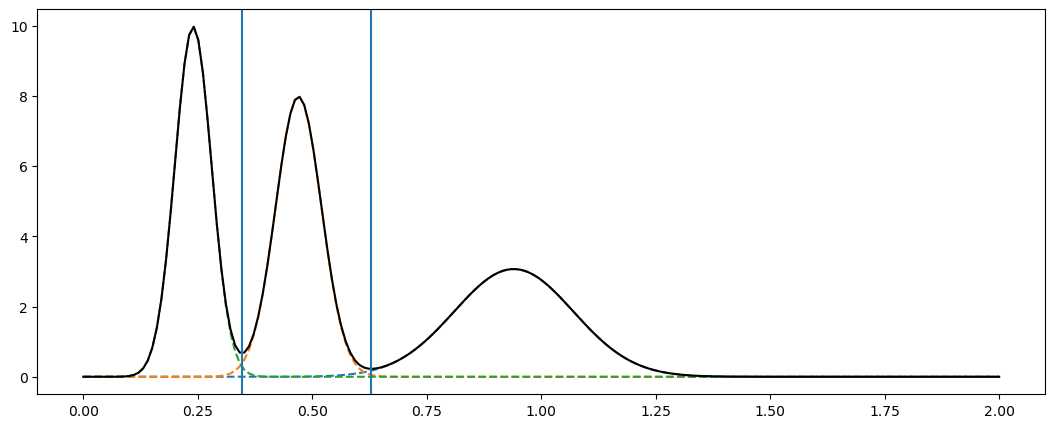

In [18]:
plot(x, nr.pdf(x), '--')
plot(x, nw.pdf(x), '--')
plot(x, np.pdf(x), '--')
plot(x, minfun(x), 'k')
axvline(r1)
axvline(r2)

In [19]:
dfr.Star.values

array(['AU Mic', 'G 9-40', 'GJ 1132', 'GJ 1214', 'GJ 1252', 'GJ 3090',
       'GJ 3470', 'GJ 3473', 'GJ 357', 'GJ 367', 'GJ 3929', 'GJ 436',
       'GJ 486', 'GJ 806', 'HD 260655', 'HD 260655', 'K2-146', 'K2-146',
       'K2-18', 'K2-25', 'K2-3', 'K2-3', 'Kepler-138', 'Kepler-138',
       'Kepler-138', 'Kepler-26', 'Kepler-26', 'L 168-9', 'L 231-32',
       'L 231-32', 'L 231-32', 'L 98-59', 'L 98-59', 'L 98-59',
       'LHS 1140', 'LHS 1140', 'LHS 1478', 'LHS 1815', 'LP 714-47',
       'LTT 1445 A', 'LTT 1445 A', 'LTT 3780', 'LTT 3780', 'TOI-1201',
       'TOI-1231', 'TOI-1235', 'TOI-1238', 'TOI-1238', 'TOI-1266',
       'TOI-1266', 'TOI-1452', 'TOI-1634', 'TOI-1685', 'TOI-1728',
       'TOI-1759', 'TOI-2136', 'TOI-269', 'TOI-776', 'TOI-776',
       'TRAPPIST-1', 'TRAPPIST-1', 'TRAPPIST-1', 'TRAPPIST-1',
       'TRAPPIST-1', 'TRAPPIST-1', 'TRAPPIST-1'], dtype=object)

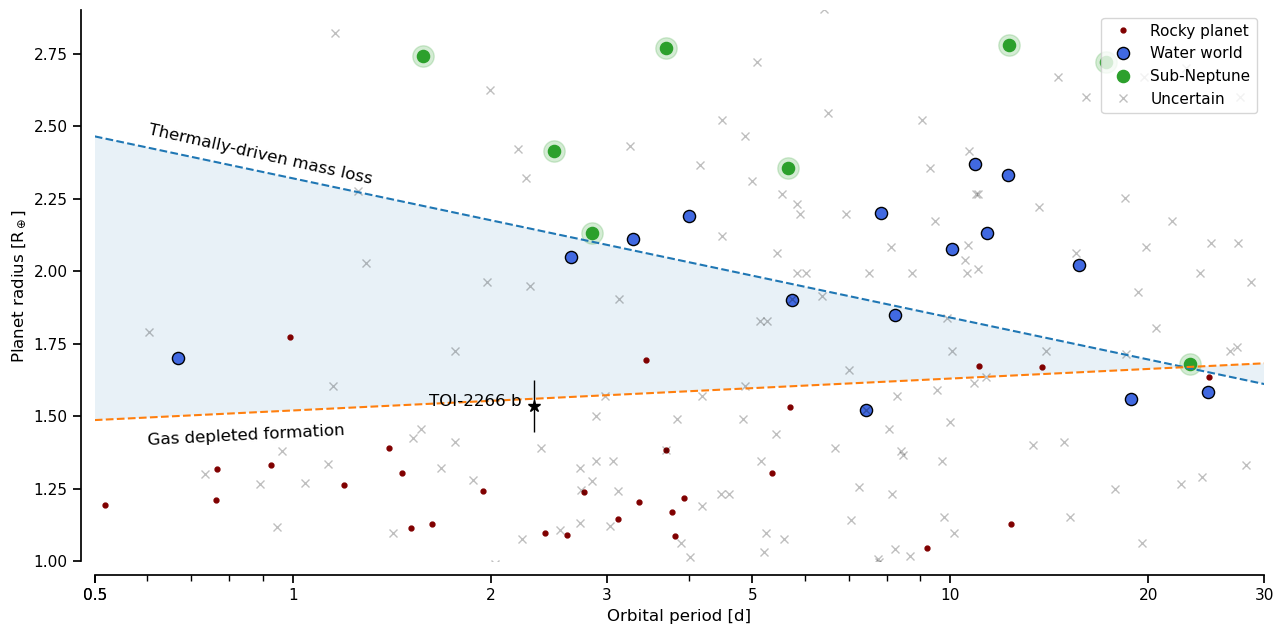

In [20]:
def plot_period_radius(context: str = "notebook", plot_bad: bool = False, cut_density: bool = True):
    assert context in ('paper', 'notebook'), "Context needs to be either 'notebook' or 'paper'" 
    xticks = [0.5, 0.5, 1, 2, 3, 5, 10, 20, 30]

        
    if cut_density:
        m_good = (dfr.R_Rterra<3) & (dfr.eD_relative <= 0.25)
    else:
        m_good = (dfr.eM_relative <= 0.25) & (dfr.eR_relative <= 0.08) & (dfr.R_Rterra<3)
    
    if context == 'notebook':
        figsize = (13, 6.5)
        lfsize = None
        fscale = 1
        ms, lw = 7, 1
    else:
        figsize = (AAPW, 0.5*AAPW)
        #figsize = (AACW, 0.8*AACW)
        fscale = 0.8
        lfsize = 'small'
        ms, lw = 5, 0.75
        
    with sb.plotting_context(context, font_scale=fscale):
        fig, ax = subplots(figsize=figsize)
        mg = ones(dfr.shape[0], 'bool') #dfr.eD_relative < 0.5
        mpuffy = mg & (dfr.rho_rhoterra < r1)
        mrocky = mg & (dfr.rho_rhoterra > r2)
        mwater = mg & (dfr.rho_rhoterra >= r1) & (dfr.rho_rhoterra <= r2)

        ax.plot(dfr.Porb_d[mrocky], dfr.R_Rterra[mrocky], '.', ms=     ms, c='maroon', label='Rocky planet')
        ax.plot(dfr.Porb_d[mwater], dfr.R_Rterra[mwater], 'o', ms=1.25*ms, c='royalblue', mec='k', mew=1, label='Water world')
        ax.plot(dfr.Porb_d[mpuffy], dfr.R_Rterra[mpuffy], 'o', ms=2.20*ms, alpha=0.2, c='C2')
        ax.plot(dfr.Porb_d[mpuffy], dfr.R_Rterra[mpuffy], 'o', ms=1.25*ms, alpha=1.0, c='C2', label='Sub-Neptune')
        l = ax.plot(dnor.orbital_period, dnor.radius_e, 'x', alpha=0.25, c='k', label='Uncertain')
        
        ax.errorbar(dfp.p.median(), dfp.radius.median(), dfp.radius.std(), fmt='k*', ms=1.25*ms, lw=lw)
        ax.set_xscale('log')
   
        px = linspace(0.5, 35, 100)
        rvu = rv_upper(px)
        rvl = rv_lower(px)
        
        ax.fill_between(px, rvl, rvu, alpha=0.1)
        ax.plot(px, rvu, '--')
        ax.plot(px, rvl, '--')
        ax.text(dfp.p.median()-0.1, dfp.radius.median(), "TOI-2266 b", ha='right')
        
        ax.legend(loc='upper right', fontsize=lfsize)
        
        setp(ax, xlabel='Orbital period [d]', ylabel='Planet radius [R$_\oplus$]', ylim=(1.0, 2.9), xlim=(0.5, 30),
            xticks=xticks, xticklabels=xticks)
        
        p1 = ax.transData.transform_point((px[0], rvu[0]))
        p2 = ax.transData.transform_point((px[-1], rvu[-1]))
        rotu = degrees(arctan2(p2[1]-p1[1], p2[0]-p1[0]))
        ax.text(0.6, 2.3, 'Thermally-driven mass loss', rotation=rotu)

        p1 = ax.transData.transform_point((px[0], rvl[0]))
        p2 = ax.transData.transform_point((px[-1], rvl[-1]))
        rotl = degrees(arctan2(p2[1]-p1[1], p2[0]-p1[0]))
        ax.text(0.6, 1.40, 'Gas depleted formation', rotation=rotl)
        sb.despine(fig, offset=10)

        fig.tight_layout()
        if context == 'paper':
            fig.subplots_adjust(bottom=0.16, left=0.1, right=0.97, top=0.98)
            fig.savefig('plots/context_period_vs_radius.pdf')
            close(fig)
    
plot_period_radius()
plot_period_radius('paper')


## Plot Radius - density

Let's take a look at how interesting the planet is considering the radius-density planet of well-characterised planets by Luque & Pallé (2022).

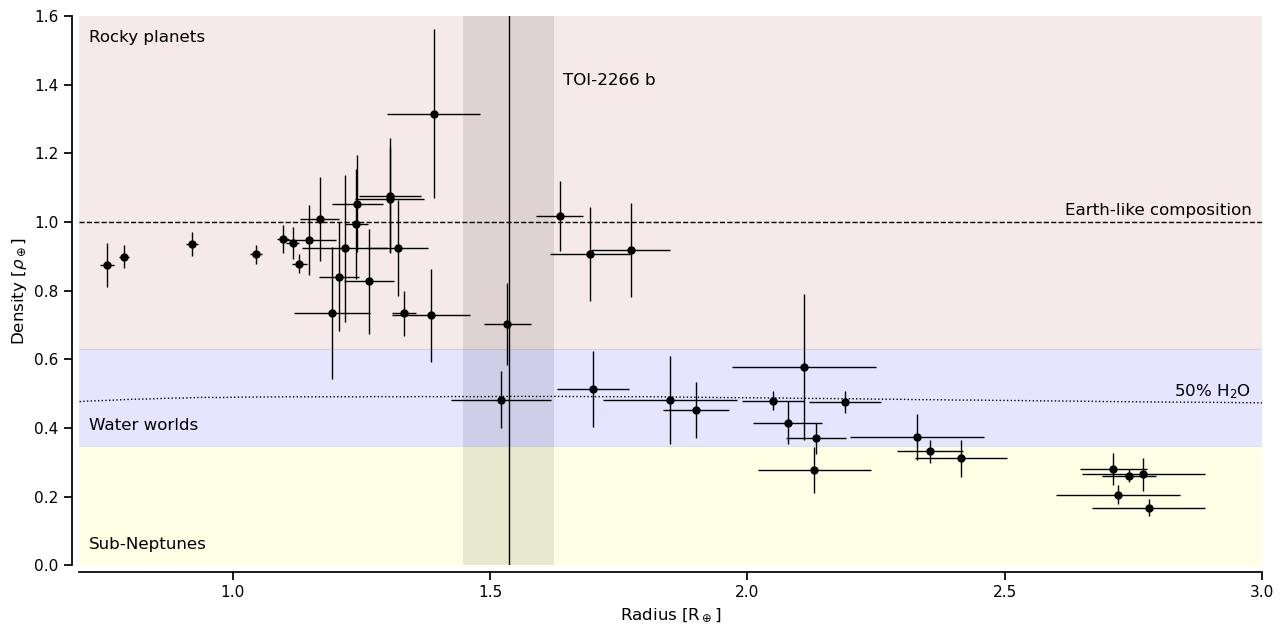

In [21]:
def plot_radius_density(context: str = "notebook", plot_bad: bool = False, cut_density: bool = True):
    assert context in ('paper', 'notebook'), "Context needs to be either 'notebook' or 'paper'" 
        
    if cut_density:
        m_good = (dfr.R_Rterra<3) & (dfr.eD_relative <= 0.25)
    else:
        m_good = (dfr.eM_relative <= 0.25) & (dfr.eR_relative <= 0.08) & (dfr.R_Rterra<3)
    
    m_good &= dfr.rho_rhoterra < 1.5
    
    if context == 'notebook':
        figsize = (13, 6.5)
        lfsize = None
        fscale = 1
        ms, lw = 5, 1
    else:
        #figsize = (AAPW, 0.5*AAPW)
        figsize = (AACW, 0.8*AACW)

        fscale = 0.8
        lfsize = 'small'
        ms, lw = 2, 0.75
    
    with sb.plotting_context(context, font_scale=fscale):
        fig, ax = subplots(figsize=figsize)

        if plot_bad:
            ax.errorbar(dfr.R_Rterra[~m_good], dfr.rho_rhoterra[~m_good],
                        xerr=dfr.edR_Rterra[~m_good], yerr=dfr.edrho_rhoterra[~m_good], 
                        fmt='ok', alpha=0.1, ms=ms, lw=lw)
        ax.errorbar(dfr.R_Rterra[m_good], dfr.rho_rhoterra[m_good],
                    xerr=dfr.edR_Rterra[m_good], yerr=dfr.edrho_rhoterra[m_good], 
                    fmt='ok', ms=ms, lw=lw)

        rm, re = dfp.radius.median(), dfp.radius.std()
        ax.axvspan(rm-re, rm+re, fc='0.9')
        ax.axvline(rm, lw=lw, c='k')

        ax.axhspan(0, r1, alpha=0.1, fc='yellow')
        ax.axhspan(r1, r2, alpha=0.1, fc='blue')
        ax.axhspan(r2, 2.0, alpha=0.1, fc='brown')


        ax.axhline(r2, lw=0.5, alpha=0.25)
        ax.axhline(r1, lw=0.5, alpha=0.25)
        ax.axhline(1, ls='--', c='k', lw=lw)
        ax.plot(wr['50%h2o'], wd['50%h2o'], 'k:', lw=lw)
        ax.text(0.72, 1.6-0.04, 'Rocky planets', ha='left', va='top', size=lfsize)
        ax.text(0.72, r1+0.04, 'Water worlds', ha='left', va='bottom', size=lfsize)
        ax.text(0.72, 0.0+0.04, 'Sub-Neptunes', ha='left', va='bottom', size=lfsize)
        ax.text(2.98, 1.02, 'Earth-like composition', ha='right', size=lfsize)
        ax.text(2.98, wd['50%h2o'].iloc[-1]+0.02, '50% H$_2$O', ha='right', size=lfsize)
        #ax.text(2.98, 0.05, 'Sub-Neptunes', ha='right', size=lfsize)
        ax.text(rm+1.2*re, 1.4, 'TOI-2266 b', size=lfsize)       
        
        setp(ax, xlabel='Radius [R$_\oplus$]', ylabel=r'Density [$\rho_\oplus$]', 
             ylim=(0.0, 1.6), xlim=(0.7, 3.0))
        sb.despine(fig, offset=5)
        fig.tight_layout()
    if context == 'paper':
        fig.subplots_adjust(bottom=0.16, left=0.17, right=0.97, top=0.98)
        fig.savefig('plots/context_radius_vs_density.pdf')
        close(fig)
        
plot_radius_density('notebook', cut_density=False)
plot_radius_density('paper', cut_density=False)